## 1. Постановка задачи

<center> <img src=https://www.kaggle.com/competitions/6960/images/header align="right" height='142' width="281"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn')

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

C:\Users\User\AppData\Local\Temp\ipykernel_12424\1942146547.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Выведем информацию о датасете:

In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data["dropoff_datetime"] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
min_date = taxi_data['pickup_datetime'].dt.date.min()
max_date = taxi_data['pickup_datetime'].dt.date.max()
print(f'Данные предоставлены за период с {min_date} по {max_date}')

Данные предоставлены за период с 2016-01-01 по 2016-06-30


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
# ваш код здесь
print(f'Количество пропущенных значений в данных: {taxi_data.isnull().sum().sum()}')

Количество пропущенных значений в данных: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [6]:
# ваш код здесь
display(taxi_data.describe())
qty_of_vendors = len(taxi_data['vendor_id'].value_counts())
max_passangers = taxi_data['passenger_count'].max()
mean_trip_duration  = taxi_data['trip_duration'].mean()
medeian_trip_duration  = taxi_data['trip_duration'].median()
min_trip_duration  = taxi_data['trip_duration'].min()
max_trip_duration  = taxi_data['trip_duration'].max()

print(f'Количество уникальных таксопарков: {qty_of_vendors}')
print(f'Максимальное количество пассажиров: {max_passangers}')
print(f'Средня длительность поездки: {mean_trip_duration.round()} секунд, медианная длительность поездки: {medeian_trip_duration} секунд')
print(f'Минимальная длительность поездки: {min_trip_duration.round()} секунд, максимальная длительность поездки: {max_trip_duration} секунд')

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03


Количество уникальных таксопарков: 2
Максимальное количество пассажиров: 9
Средня длительность поездки: 959.0 секунд, медианная длительность поездки: 662.0 секунд
Минимальная длительность поездки: 1 секунд, максимальная длительность поездки: 3526282 секунд


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [7]:
# ваш код здесь
def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_of_week
    return df

taxi_data = add_datetime_features(taxi_data)

In [8]:
saturday_trips = taxi_data[taxi_data['pickup_day_of_week'] == 5]['pickup_day_of_week'].count()
mean_trips_per_day = taxi_data['pickup_date'].value_counts().mean().round()
print(f'Количество поездок в субботу: {saturday_trips}')
print(f'Среднее количество поездок за день: {mean_trips_per_day}')

Количество поездок в субботу: 220868
Среднее количество поездок за день: 8015.0


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [9]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
# ваш код здесь
def add_holiday_features(taxi_data, holiday_data):
    holidays = pd.to_datetime(holiday_data['date']).dt.date.values
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].apply(lambda x: 1 if x in holidays else 0)
    return taxi_data

In [10]:
taxi_data = add_holiday_features(taxi_data, holiday_data)

In [11]:
median_duration_holidays = taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median().round()
print(f'Медианная длительность поездки в праздничные дни: {median_duration_holidays} секунд')

Медианная длительность поездки в праздничные дни: 585.0 секунд


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [12]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')
# ваш код здесь
def add_osrm_features(trips_df, osrm_df):
    osrm_features = osrm_df[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    trips_with_orsm_df = pd.merge(trips_df, osrm_features, on='id', how='left')
    return trips_with_orsm_df
taxi_data = add_osrm_features(taxi_data, osrm_data)

In [13]:
trip_duration_diff_taxi_vs_osrm = taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()
missing_values_count = taxi_data.isnull().any(axis=1).sum()
print(f'Разница ежду медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM: {trip_duration_diff_taxi_vs_osrm.round()}')
print(f'Количество строк с пропусками: {missing_values_count}')

Разница ежду медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM: 372.0
Количество строк с пропусками: 1


In [14]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [15]:
# ваш код здесь
def add_geographical_features(taxi_data):
    lat1 = taxi_data['pickup_latitude']
    lng1 = taxi_data['pickup_longitude']
    lat2 = taxi_data['dropoff_latitude']
    lng2 = taxi_data['dropoff_longitude']
    taxi_data['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
    taxi_data['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return taxi_data

taxi_data = add_geographical_features(taxi_data)

In [16]:
harvesine_distance_median = taxi_data['haversine_distance'].median()
print(f'Медианное расстояние по формуле гаверсинуса для поездок: {harvesine_distance_median.round(2)} км')

Медианное расстояние по формуле гаверсинуса для поездок: 2.09 км


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [17]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(taxi_data, kmeans):
    taxi_data['geo_cluster'] = kmeans.predict(taxi_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])
    return taxi_data

taxi_data = add_cluster_features(taxi_data, kmeans)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [18]:
cluster_counts_min = taxi_data['geo_cluster'].value_counts().min()
print(f"Количество поездок в наименьшем кластере: {cluster_counts_min}")

Количество поездок в наименьшем кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [19]:
weather_data = pd.read_csv('data/weather_data.csv')

# ваш код здесь
def add_weather_features(trips_df, weather_df):
    # Конвертация столбца времени в datetime, если это еще не сделано
    weather_df['time'] = pd.to_datetime(weather_df['time'])
    weather_df['date'] = weather_df['time'].dt.date
    weather_df['hour'] = weather_df['time'].dt.hour

    # Объединяем данные с левым объединением
    merged_df = trips_df.copy()
    merged_df = merged_df.merge(weather_df.loc[:, ['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']],
                                left_on=['pickup_date', 'pickup_hour'],
                                right_on=['date', 'hour'],
                                how='left')

    # Удаление временных столбцов
    merged_df.drop(['date', 'hour'], axis=1, inplace=True)
    
    return merged_df

taxi_data = add_weather_features(taxi_data, weather_data)

In [20]:
snow_trips_count = taxi_data[taxi_data['events'] == 'Snow'].shape[0]
missing_data =  taxi_data[['temperature', 'visibility', 'wind speed', 'precip']].isna().sum().max()/ taxi_data.shape[0]
print(f"Количество поездок в снежную погоду: {snow_trips_count}")
print(f"Доля (в процентах) в общем количестве наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями: {missing_data.round(2)}")

Количество поездок в снежную погоду: 13126
Доля (в процентах) в общем количестве наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями: 0.01


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [21]:
# ваш код здесь
def fill_null_weather_data(data):
    # Заполнение пропусков в погодных условиях медианными значениями по дате
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in weather_cols:
        data[col] = data[col].fillna(data.groupby('pickup_date')[col].transform('median'))
    
    # Заполнение пропусков в столбце events строкой 'None'
    data['events'] = data['events'].fillna('None')
    
    # Заполнение пропусков в столбцах с информацией из OSRM API медианными значениями по всему столбцу
    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    for col in osrm_cols:
        data[col] = data[col].fillna(data[col].median())
        
    return data

taxi_data = fill_null_weather_data(taxi_data)

In [22]:
median_temp = taxi_data['temperature'].median()
print(f'Медиана в столбце temperature после заполнения пропусков равна: {median_temp.round(1)}')

Медиана в столбце temperature после заполнения пропусков равна: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


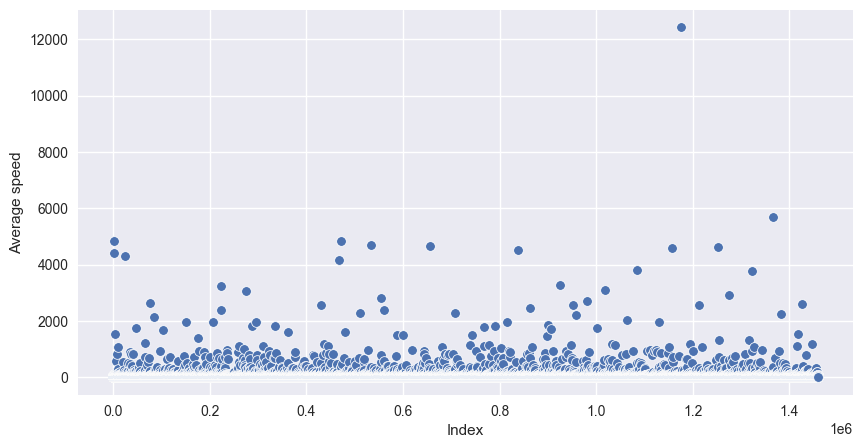

In [23]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [24]:
# ваш код здесь
long_trips = taxi_data[taxi_data['trip_duration'] / 3600 > 24]
high_speed = taxi_data[taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300]
print(f'Количество поездок, длительность которых больше 24 часов: {long_trips.shape[0]}')
print(f'Количество поездок, средняя скорость которых более 300 км/ч: {high_speed.shape[0]}')

taxi_data = taxi_data[taxi_data['trip_duration'] / 3600 < 24]
taxi_data = taxi_data[taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 < 300]

Количество поездок, длительность которых больше 24 часов: 4
Количество поездок, средняя скорость которых более 300 км/ч: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [25]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


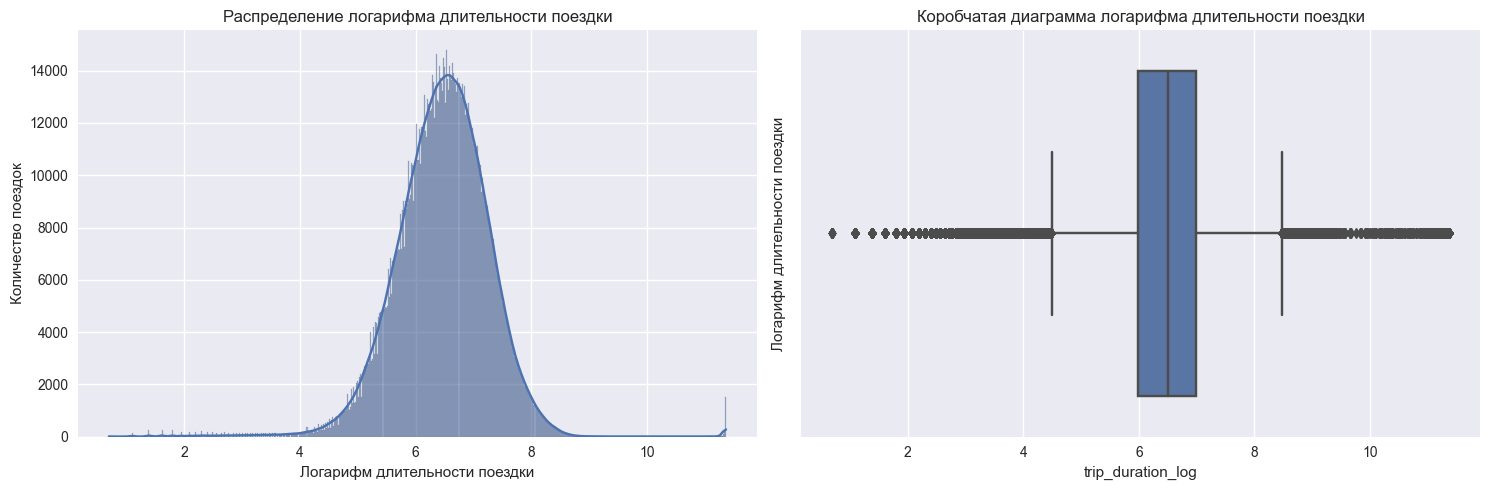

p-value теста Д-Агостино: 0.00


In [26]:
# ваш код здесь
# Создание подграфиков для гистограммы и коробчатой диаграммы
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма логарифмированной длительности поездки
sns.histplot(taxi_data['trip_duration_log'], kde=True, ax=axes[0])
axes[0].set_title('Распределение логарифма длительности поездки')
axes[0].set_xlabel('Логарифм длительности поездки')
axes[0].set_ylabel('Количество поездок')

# Коробчатая диаграмма логарифмированной длительности поездки
sns.boxplot(x=taxi_data['trip_duration_log'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма логарифма длительности поездки')
axes[1].set_ylabel('Логарифм длительности поездки')

plt.tight_layout()
plt.show()

# Проведение теста Д'Агостино на нормальность
stat, p_value = stats.normaltest(taxi_data['trip_duration_log'])
print(f'p-value теста Д-Агостино: {p_value:.2f}')

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


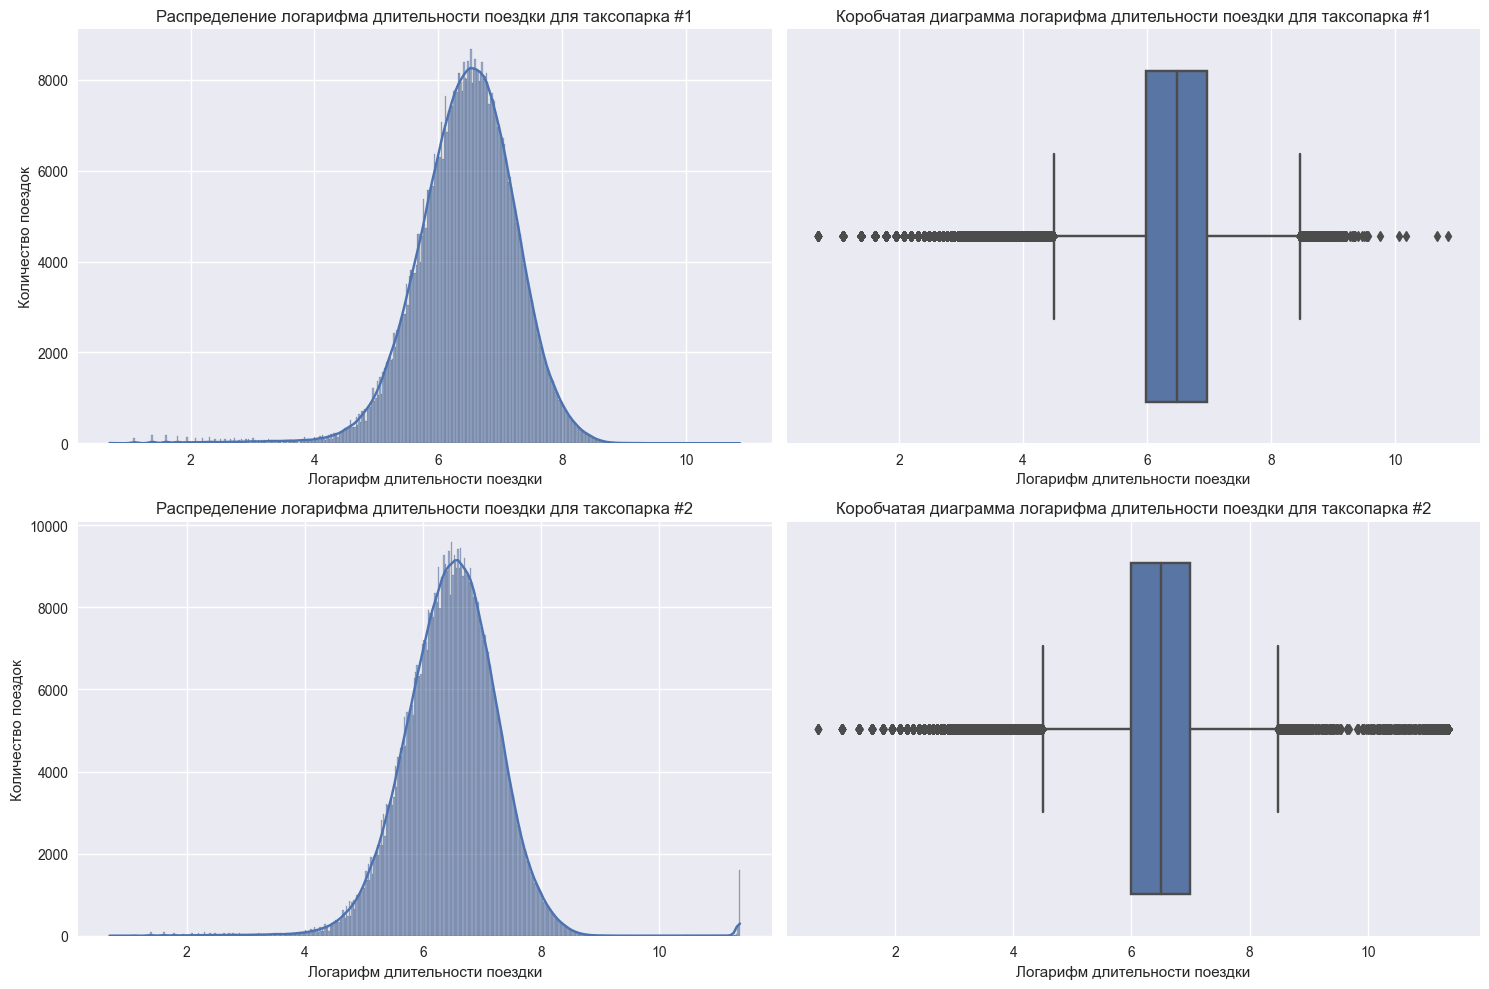

In [27]:
# ваш код здесь
vendors = taxi_data['vendor_id'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 5 * len(vendors)))

for id, vendor in enumerate(sorted(vendors)):
    data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    
    sns.histplot(data, kde=True, ax=axes[id][0])
    axes[id][0].set_title(f'Распределение логарифма длительности поездки для таксопарка #{vendor}')
    axes[id][0].set_xlabel('Логарифм длительности поездки')
    axes[id][0].set_ylabel('Количество поездок')
    
    sns.boxplot(x=data,  ax=axes[id][1])
    axes[id][1].set_title(f'Коробчатая диаграмма логарифма длительности поездки для таксопарка #{vendor}')
    axes[id][1].set_xlabel('Логарифм длительности поездки')

plt.tight_layout()
plt.show()

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


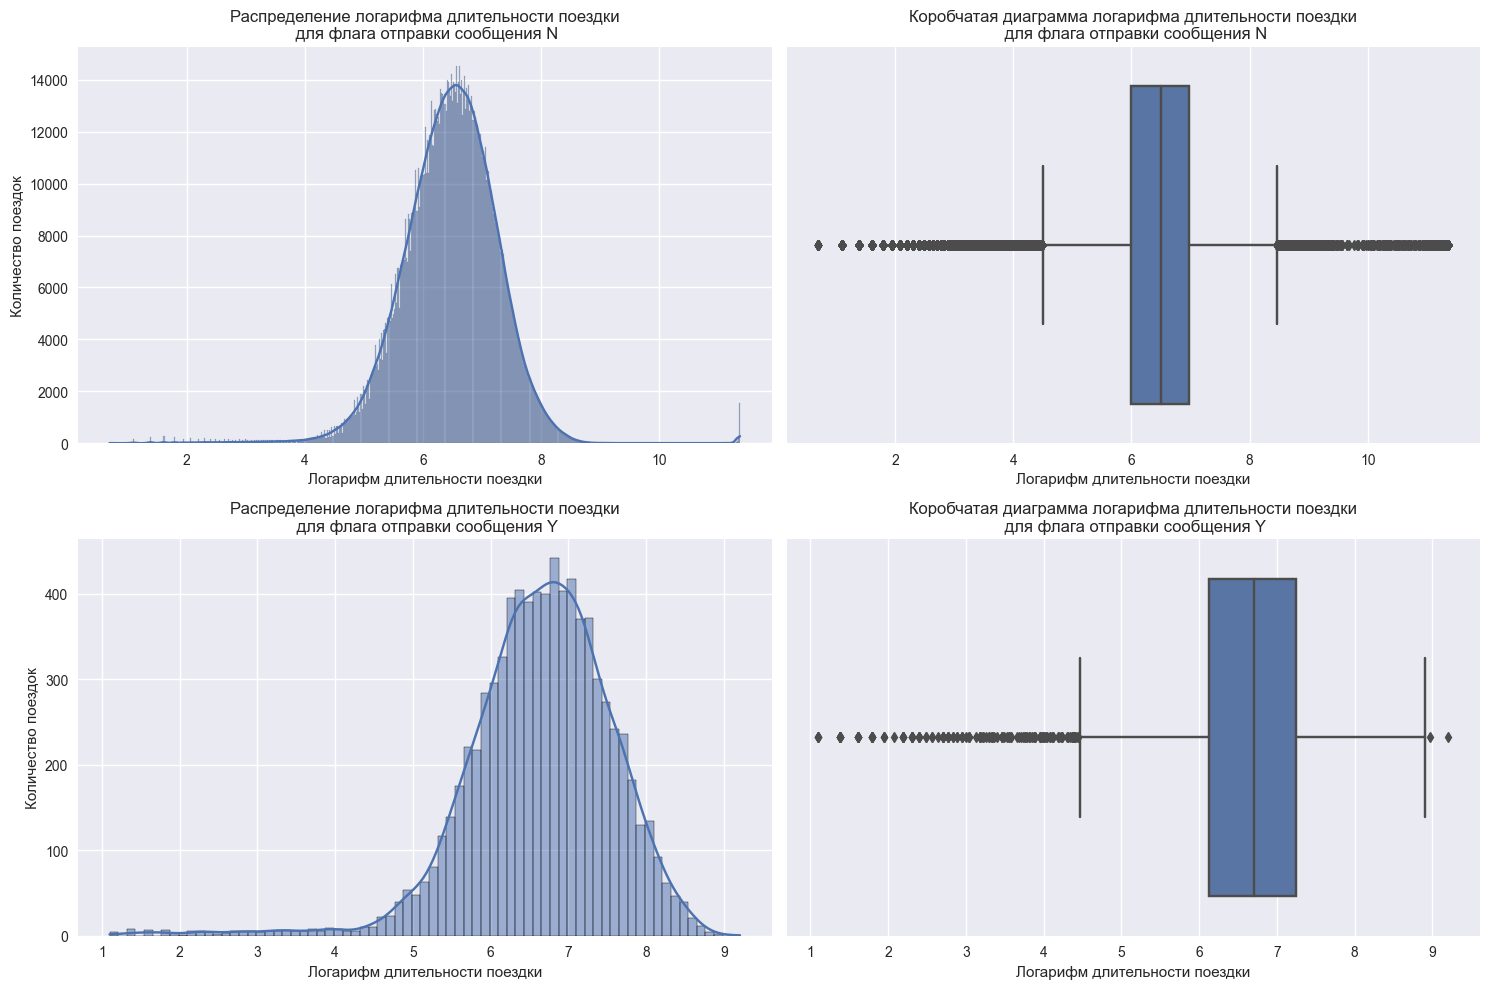

In [28]:
# ваш код здесь
flags = taxi_data['store_and_fwd_flag'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 5 * len(flags)))

for id, flag in enumerate(sorted(flags)):
    data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    
    sns.histplot(data, kde=True, ax=axes[id][0])
    axes[id][0].set_title(f'Распределение логарифма длительности поездки\n для флага отправки сообщения {flag}')
    axes[id][0].set_xlabel('Логарифм длительности поездки')
    axes[id][0].set_ylabel('Количество поездок')
    
    sns.boxplot(x=data,  ax=axes[id][1])
    axes[id][1].set_title(f'Коробчатая диаграмма логарифма длительности поездки\n для флага отправки сообщения {flag}')
    axes[id][1].set_xlabel('Логарифм длительности поездки')

plt.tight_layout()
plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


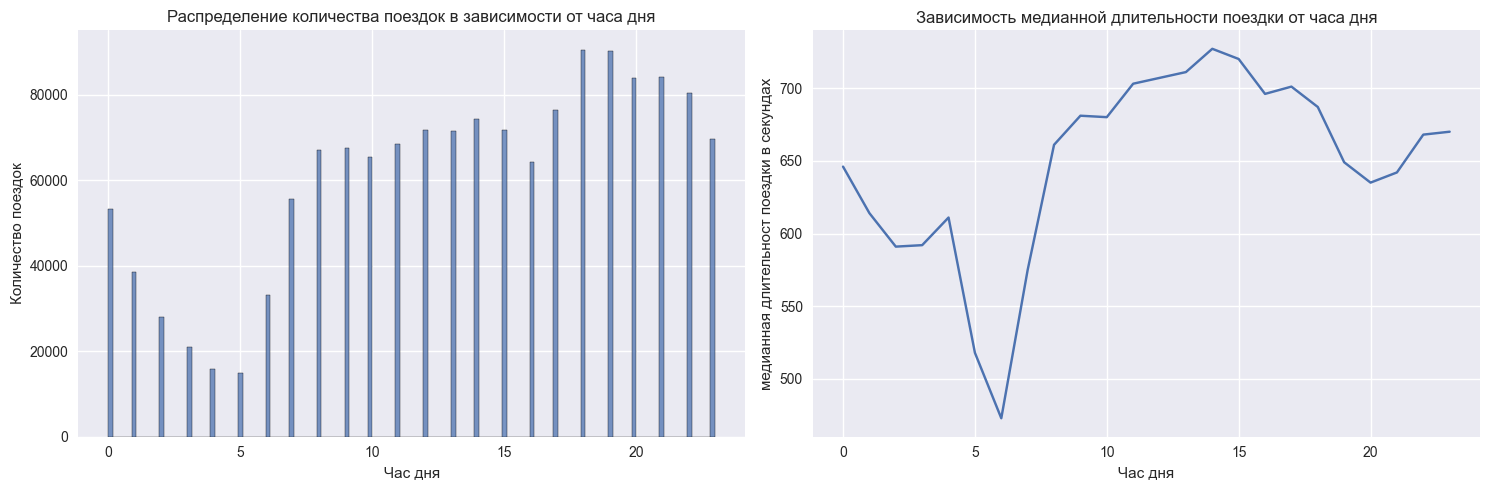

In [29]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=taxi_data, x='pickup_hour', ax=axes[0])
axes[0].set_title('Распределение количества поездок в зависимости от часа дня')
axes[0].set_xlabel('Час дня')
axes[0].set_ylabel('Количество поездок')

data = taxi_data.groupby('pickup_hour')['trip_duration'].median()
sns.lineplot(data, ax=axes[1])
axes[1].set_title('Зависимость медианной длительности поездки от часа дня')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('медианная длительност поездки в секундах')

plt.tight_layout()
plt.show()

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


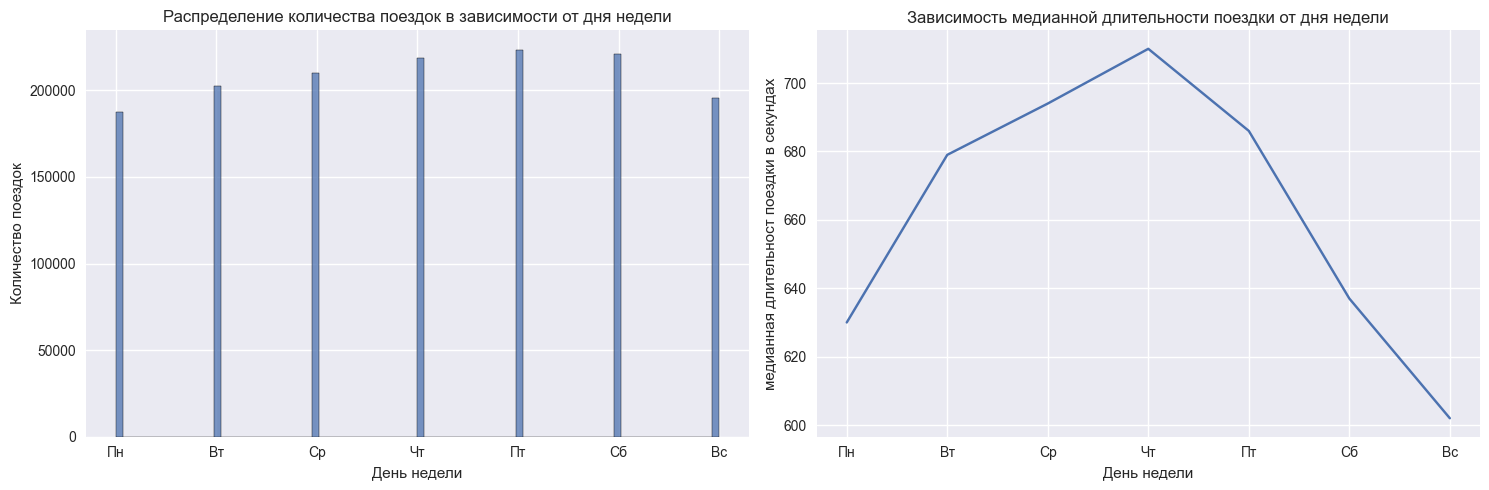

In [30]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=taxi_data, x='pickup_day_of_week', ax=axes[0])
axes[0].set_title('Распределение количества поездок в зависимости от дня недели')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество поездок')
axes[0].set_xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']) 

data = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()
sns.lineplot(data, ax=axes[1])
axes[1].set_title('Зависимость медианной длительности поездки от дня недели')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('медианная длительност поездки в секундах')
axes[1].set_xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']) 

plt.tight_layout()
plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

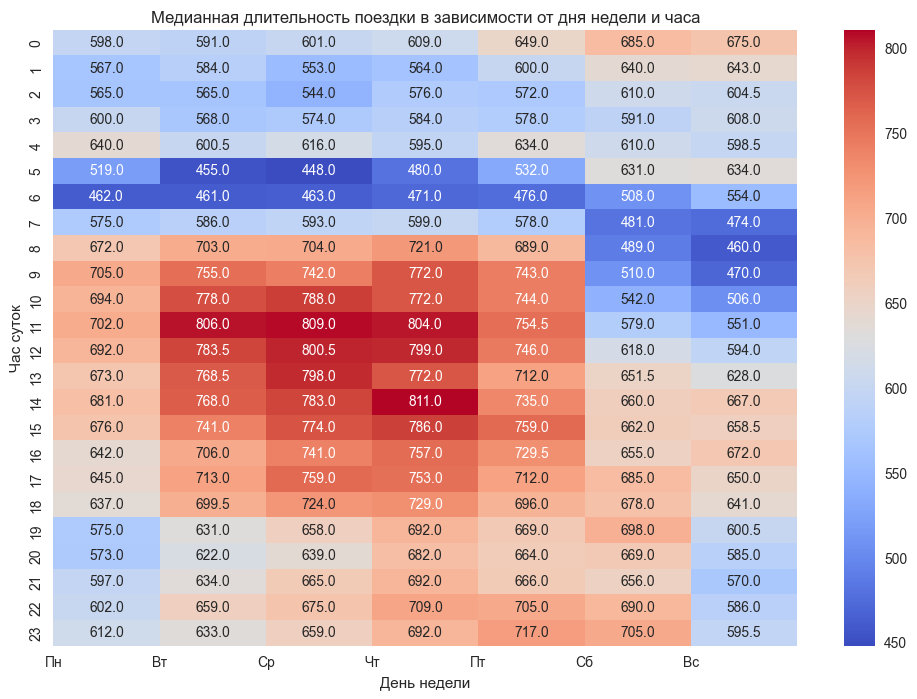

In [31]:
# ваш код здесь
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
)

# Визуализация с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Медианная длительность поездки в зависимости от дня недели и часа')
plt.xlabel('День недели')
plt.ylabel('Час суток')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']) 
plt.show()


### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


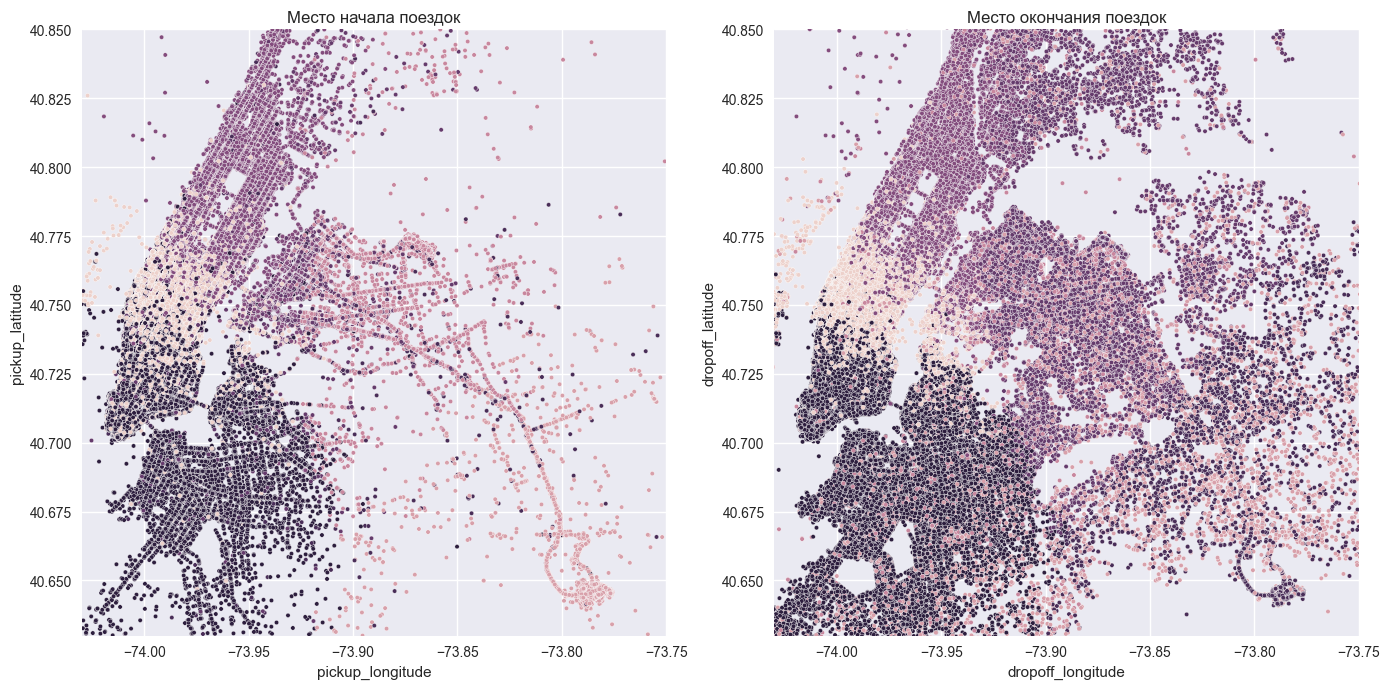

In [32]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
mask1 = taxi_data.pickup_longitude >= city_long_border[0]
mask2 = taxi_data.pickup_longitude <= city_long_border[1]
mask3 = taxi_data.pickup_latitude >= city_lat_border[0]
mask4 = taxi_data.pickup_latitude <= city_lat_border[1]
data = taxi_data[(mask1) & (mask2) & (mask3) & (mask4)]

# ваш код здесь
# Создание фигуры и осей для двух графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Диаграмма рассеяния для начала поездок
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='geo_cluster',
                data=data, ax=axs[0], s=10, legend=False)
axs[0].set_xlim(city_long_border)
axs[0].set_ylim(city_lat_border)
axs[0].set_title('Место начала поездок')


# Диаграмма рассеяния для окончания поездок
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster',
                data=data, ax=axs[1], s=10, legend=False)
axs[1].set_xlim(city_long_border)
axs[1].set_ylim(city_lat_border)
axs[1].set_title('Место окончания поездок')

# Показать графики
plt.tight_layout()
plt.show()

In [33]:
missing_clusters = 10 - len(data['geo_cluster'].unique())
print(f'Количество отсутствующих на диаграммах кластеров: {missing_clusters}')

Количество отсутствующих на диаграммах кластеров: 3


## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [34]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [35]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [36]:
# ваш код здесь
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)
cols_left = train_data.shape[1]
print(f'Осталось {cols_left} столбцов')

Осталось 25 столбцов


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [37]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [38]:
# ваш код здесь
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [39]:
mean_vendor_id = train_data['vendor_id'].mean()
mean_store_and_fwd_flag = train_data['store_and_fwd_flag'].mean()
print(f'Cреднее по закодированному столбцу vendor_id: {mean_vendor_id:.2f}')
print(f'Cреднее по закодированному столбцу store_and_fwd_flag: {mean_store_and_fwd_flag:.3f}')

Cреднее по закодированному столбцу vendor_id: 0.53
Cреднее по закодированному столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [40]:
# ваш код здесь
# Инициализация кодировщика
one_hot_encoder = preprocessing.OneHotEncoder(drop='first', handle_unknown='ignore')

# Выбор категориальных столбцов для кодирования
categorical_columns = ['pickup_day_of_week', 'geo_cluster', 'events']

# Обучение кодировщика и трансформация данных
encoded_data = one_hot_encoder.fit_transform(train_data[categorical_columns])

# Получение новых названий столбцов из кодировщика
column_names = one_hot_encoder.get_feature_names_out(categorical_columns)

# Создание нового DataFrame с закодированными данными
data_onehot = pd.DataFrame(encoded_data.toarray(), columns=column_names)

In [41]:
qty_of_binary_cols = data_onehot.shape[1]
print(f'Количество бинарных столбцов, сгенерированных с помощью однократного кодирования: {qty_of_binary_cols}')

Количество бинарных столбцов, сгенерированных с помощью однократного кодирования: 18


Добавим полученную таблицу с закодированными признаками:

In [42]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(categorical_columns, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [43]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [44]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [45]:
# ваш код здесь
# Инициализация метода отбора признаков
score_func = feature_selection.f_regression
k_best = feature_selection.SelectKBest(score_func=score_func, k=25)

# Обучение на обучающем наборе и преобразование признаков
X_train_kbest = k_best.fit_transform(X_train, y_train_log)

# Получение маски выбранных признаков
mask = k_best.get_support()

# Названия выбранных признаков
selected_features = X_train.columns[mask]

# Оставим только выбранные признаки в тренировочной и тестовой выборках
X_train = X_train[selected_features]
X_valid = X_valid[selected_features]

print(pd.Series(selected_features))

0                vendor_id
1          passenger_count
2         pickup_longitude
3          pickup_latitude
4        dropoff_longitude
5         dropoff_latitude
6       store_and_fwd_flag
7              pickup_hour
8           pickup_holiday
9           total_distance
10       total_travel_time
11         number_of_steps
12      haversine_distance
13             temperature
14    pickup_day_of_week_1
15    pickup_day_of_week_2
16    pickup_day_of_week_3
17    pickup_day_of_week_4
18    pickup_day_of_week_5
19    pickup_day_of_week_6
20           geo_cluster_2
21           geo_cluster_3
22           geo_cluster_6
23           geo_cluster_7
24           geo_cluster_8
dtype: object


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [46]:
# ваш код здесь
# Инициализация нормализатора
scaler = preprocessing.MinMaxScaler()

# Обучение нормализатора на обучающей выборке
scaler.fit(X_train)

# Трансформация обучающей и валидационной выборок
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Расчет среднего арифметического для первого предиктора в валидационной выборке
mean_first_predictor = X_valid_scaled[:, 0].mean()

print(f'Cреднее арифметическое для первого предиктора из валидационной выборки: {mean_first_predictor:.2f}')

Cреднее арифметическое для первого предиктора из валидационной выборки: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [47]:
# ваш код здесь
# Инициализируем модель линейной регрессии
lr = linear_model.LinearRegression()

# Обучим модель
lr.fit(X_train_scaled, y_train_log)

# Сделаем предсказание
y_train_log_predict = lr.predict(X_train_scaled)
y_valid_log_predict = lr.predict(X_valid_scaled)

# Рассчитаем метрику
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict))

print(f'RMSLE на обучающей выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на обучающей выборке: 0.54
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [48]:
# ваш код здесь
# Создаем полиномиальные признаки второй степени
poly_features = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly_features.fit(X_train_scaled)

X_train_scaled_poly = poly_features.transform(X_train_scaled)
X_valid_scaled_poly = poly_features.transform(X_valid_scaled)

# Создаем и обучаем модель линейной регрессии на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train_log)

# Предсказание на тренировочных и валидационных данных 
y_train_log_predict_poly = lr_poly.predict(X_train_scaled_poly)
y_valid_log_predict_poly = lr_poly.predict(X_valid_scaled_poly)

# Рассчитаем метрику
rmsle_train_poly = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict_poly))
rmsle_valid_poly = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict_poly))

print(f'RMSLE на обучающей выборке: {rmsle_train_poly:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid_poly:.2f}')

RMSLE на обучающей выборке: 0.47
RMSLE на валидационной выборке: 0.69


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [49]:
# ваш код здесь
# Создаем и обучаем модель Ridge регрессии
ridge_reg = linear_model.Ridge(alpha=1)
ridge_reg.fit(X_train_scaled_poly, y_train_log)

# Предсказание на тренировочных и валидационных данных
y_train_log_predict_poly = ridge_reg.predict(X_train_scaled_poly)
y_valid_log_predict_poly = ridge_reg.predict(X_valid_scaled_poly)

# Рассчитаем метрику
rmsle_train_poly = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict_poly))
rmsle_valid_poly = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict_poly))

print(f'RMSLE на обучающей выборке: {rmsle_train_poly:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid_poly:.2f}')

RMSLE на обучающей выборке: 0.48
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [50]:
# ваш код здесь
# Создание модели дерева решений
tree_reg = tree.DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train_log)

# Предсказание на тренировочных и валидационных данных
y_train_log_predict = tree_reg.predict(X_train_scaled)
y_vlid_log_predict = tree_reg.predict(X_valid_scaled)

# Рассчитаем метрику
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict))

print(f'RMSLE на обучающей выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на обучающей выборке: 0.00
RMSLE на валидационной выборке: 0.54


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


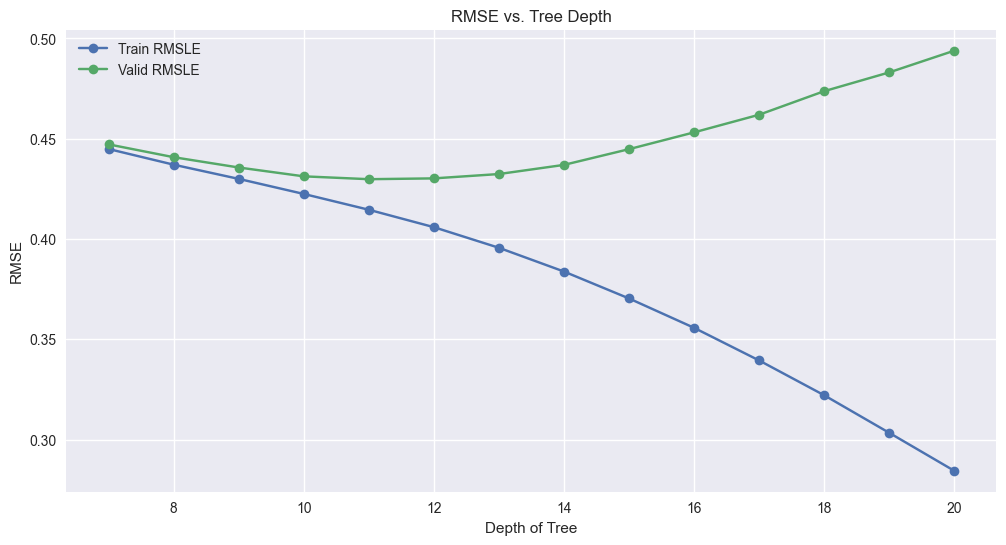

In [51]:
# ваш код здесь
# Зададим варианты глубины деревьев
max_depths = range(7, 21)

# Обозначим random_state
random_state = 42

# В цикле переберем все воможные варианты глубины деревьев и рассчитаем метрики для каждого варианта
rmsle_train_list = []
rmsle_valid_list = []

for depth in max_depths:
    # Создание модели дерева решений
    tree_reg = tree.DecisionTreeRegressor(random_state=42, max_depth=depth)
    tree_reg.fit(X_train_scaled, y_train_log)

    # Предсказание на тренировочных и валидационных данных
    y_train_log_predict = tree_reg.predict(X_train_scaled)
    y_valid_log_predict = tree_reg.predict(X_valid_scaled)

    # Рассчитаем метрику
    rmsle_train = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict))
    rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict))
    
    # Занесем полученные метрики в соответствующие списки
    rmsle_train_list.append(rmsle_train)
    rmsle_valid_list.append(rmsle_valid)
    
# Построение графиков    
plt.figure(figsize=(12, 6))
plt.plot(max_depths, rmsle_train_list, label='Train RMSLE', marker='o')
plt.plot(max_depths, rmsle_valid_list, label='Valid RMSLE', marker='o')

plt.title('RMSE vs. Tree Depth')
plt.xlabel('Depth of Tree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [52]:
# Создание модели дерева решений
tree_reg = tree.DecisionTreeRegressor(random_state=42, max_depth=12)
tree_reg.fit(X_train_scaled, y_train_log)

# Предсказание на тренировочных и валидационных данных
y_train_log_predict = tree_reg.predict(X_train_scaled)
y_valid_log_predict = tree_reg.predict(X_valid_scaled)

# Рассчитаем метрику
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict))

print(f'RMSLE на обучающей выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на обучающей выборке: 0.41
RMSLE на валидационной выборке: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [53]:
# ваш код здесь
# Создание модели случайного леса с заданными параметрами
random_forest = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)

# Обучение модели
random_forest.fit(X_train_scaled, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_log_predict = random_forest.predict(X_train_scaled)
y_valid_log_predict = random_forest.predict(X_valid_scaled)

# Рассчитаем метрику
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict))

print(f'RMSLE на обучающей выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на обучающей выборке: 0.40
RMSLE на валидационной выборке: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [54]:
# ваш код здесь
# Создание модели градиентного бустинга с заданными параметрам
grad_boost = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

# Обучение модели на тренировочной выборке
grad_boost.fit(X_train_scaled, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_log_predict = grad_boost.predict(X_train_scaled)
y_valid_log_predict = grad_boost.predict(X_valid_scaled)

# Рассчитаем метрику
rmsle_train = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_log_predict))
rmsle_valid = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_log_predict))

print(f'RMSLE на обучающей выборке: {rmsle_train:.2f}')
print(f'RMSLE на валидационной выборке: {rmsle_valid:.2f}')

RMSLE на обучающей выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


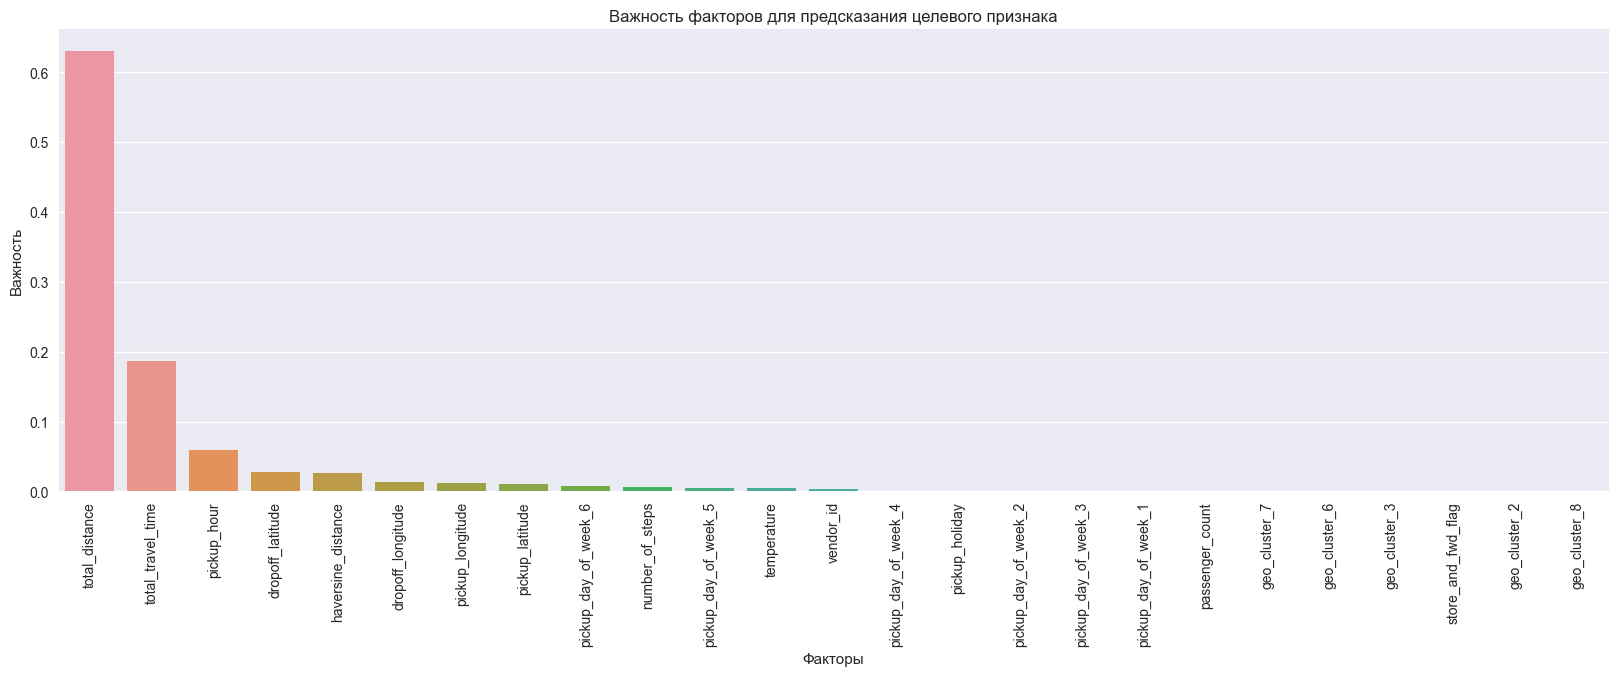

In [55]:
# ваш код здесь
feature_importance = grad_boost.feature_importances_
col_names = X_train.columns
data = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['feature_name', 'importance']).sort_values(by='importance', ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(data = data, x='feature_name', y='importance')
plt.tick_params(axis='x', labelrotation=90)
plt.title('Важность факторов для предсказания целевого признака')
plt.xlabel('Факторы')
plt.ylabel('Важность')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [56]:
# ваш код здесь
# Предсказание на валидационной выборке, используем модель градиентного бустинга
y_valid_log_predict = grad_boost.predict(X_valid_scaled)

# Преобразование предсказаний модели и истинных значений из логарифмического масштаба обратно в исходный масштаб
y_valid = (np.exp(y_valid_log) - 1) / 60
y_valid_predict = (np.exp(y_valid_log_predict) - 1) / 60

# Рассчитаем метрику
mae_valid = metrics.median_absolute_error(y_valid, y_valid_predict)

print(f'MeAE на валидационной выборке: {mae_valid:.1f} мин.')

MeAE на валидационной выборке: 1.8 мин.


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [59]:
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [60]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[categorical_columns]).toarray()
column_names = one_hot_encoder.get_feature_names_out(categorical_columns)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(categorical_columns, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[selected_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [61]:
# ваш код здесь
y_test_predict = np.exp(grad_boost.predict(X_test_scaled)) - 1
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

После чего модуль можно импортировать:

In [64]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [67]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=list(selected_features))
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=list(selected_features))
dtest = xgb.DMatrix(X_test_scaled, feature_names=list(selected_features))

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [69]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.73992	valid-rmse:0.74193
[10]	train-rmse:0.49100	valid-rmse:0.49357
[20]	train-rmse:0.44093	valid-rmse:0.44375
[30]	train-rmse:0.42613	valid-rmse:0.42914
[40]	train-rmse:0.41868	valid-rmse:0.42183
[50]	train-rmse:0.41332	valid-rmse:0.41675
[60]	train-rmse:0.40980	valid-rmse:0.41347
[70]	train-rmse:0.40686	valid-rmse:0.41075
[80]	train-rmse:0.40427	valid-rmse:0.40854
[90]	train-rmse:0.40243	valid-rmse:0.40702
[100]	train-rmse:0.40069	valid-rmse:0.40561
[110]	train-rmse:0.39934	valid-rmse:0.40453
[120]	train-rmse:0.39780	valid-rmse:0.40328
[130]	train-rmse:0.39629	valid-rmse:0.40208
[140]	train-rmse:0.39528	valid-rmse:0.40127
[150]	train-rmse:0.39413	valid-rmse:0.40040
[160]	train-rmse:0.39303	valid-rmse:0.39957
[170]	train-rmse:0.39219	valid-rmse:0.39897
[180]	train-rmse:0.39136	valid-rmse:0.39843
[190]	train-rmse:0.39066	valid-rmse:0.39800
[200]	train-rmse:0.38988	valid-rmse:0.39760
[210]	train-rmse:0.38926	valid-rmse:0.39721
[220]	train-rmse:0.38847	valid-rmse:0.39668

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [70]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39455


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


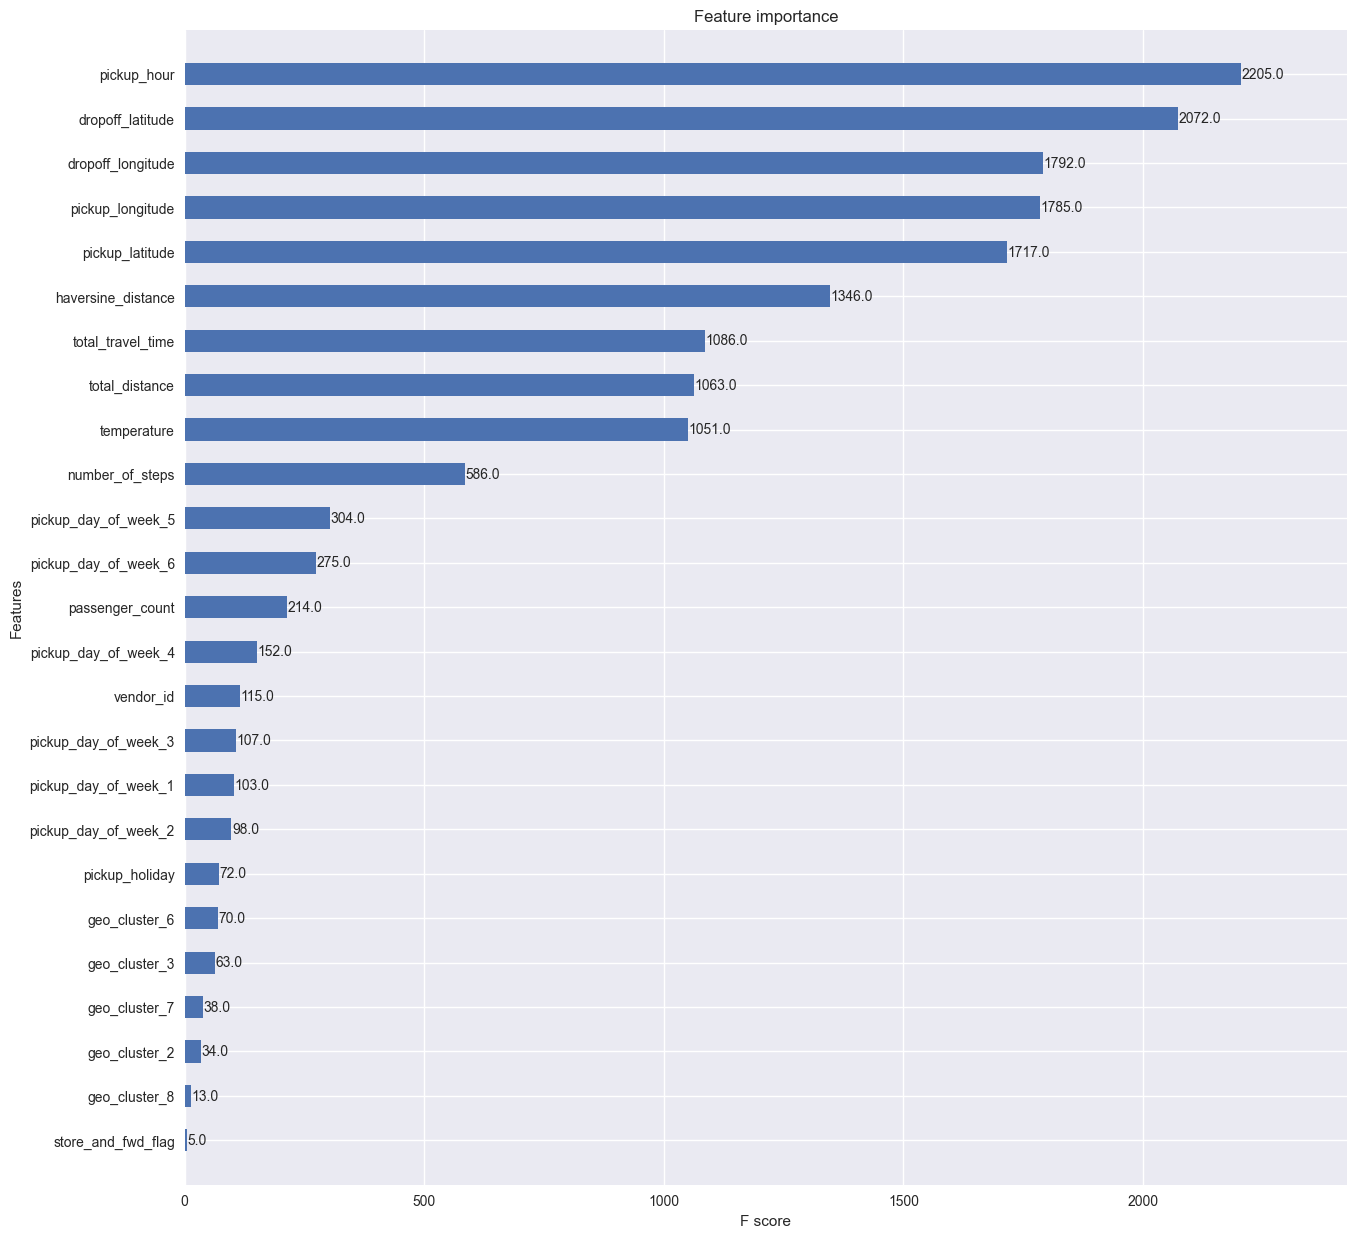

In [72]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5);